In [ ]:
!pip install git+https://github.com/openai/whisper.git -q

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 MB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 76.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.1/153.1 kB 15.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 66.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 59.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 90.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install pydub

In [ ]:
import whisper
from pydub import AudioSegment

In [ ]:
model=whisper.load_model("medium")

100%|██████████████████████████████████████| 1.42G/1.42G [00:13<00:00, 111MiB/s]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pandas as pd
def process_audio_files_and_save_to_csv(directory_path, output_csv_path):
    data = []

    for filename in os.listdir(directory_path):
        if filename.endswith(".mp3"):
            audio_file_path = os.path.join(directory_path, filename)
            text = model.transcribe(audio_file_path)
            text = text['text']
            text = text[47:]
            filename = filename.split('.')
            filename = int(filename[0])

            data.append({
                'Filename': filename,
                'Text': text
            })

    df = pd.DataFrame(data)
    df.to_csv(output_csv_path, index=False)

In [ ]:
#!unzip /content/drive/MyDrive/Final_Project_data/AUDIO.zip
!unzip /content/drive/MyDrive/Final_Project_data/summary.zip
!unzip /content/drive/MyDrive/Final_Project_data/text.zip

Archive:  /content/drive/MyDrive/Final_Project_data/summary.zip
  inflating: summary/000000.txt      
  inflating: summary/000001.txt      
  inflating: summary/000002.txt      
  inflating: summary/000003.txt      
  inflating: summary/000004.txt      
  inflating: summary/000005.txt      
  inflating: summary/000006.txt      
  inflating: summary/000007.txt      
  inflating: summary/000008.txt      
  inflating: summary/000009.txt      
  inflating: summary/000010.txt      
  inflating: summary/000011.txt      
  inflating: summary/000012.txt      
  inflating: summary/000013.txt      
  inflating: summary/000014.txt      
  inflating: summary/000015.txt      
  inflating: summary/000016.txt      
  inflating: summary/000017.txt      
  inflating: summary/000018.txt      
  inflating: summary/000019.txt      
  inflating: summary/000020.txt      
  inflating: summary/000021.txt      
  inflating: summary/000022.txt      
  inflating: summary/000023.txt      
  inflating: summary/000

In [ ]:
audio_directory = '/content/AUDIO'
output_csv_file = "data1.csv"

process_audio_files_and_save_to_csv(audio_directory, output_csv_file)

In [ ]:
import pandas as pd
data1 = pd.read_csv('data1.csv')
data1

,Filename,Text
0,30,My Breaking In I was now beginning to grow ha...
1,200,ley Chapter 11 Bad News Have you heard the new...
2,60,Ruined and Going Downhill As soon as my knees ...
3,56,Fair Start The name of the coachman was John ...
4,36,A Talk in the Orchard Ginger and I were not of...
...,...,...
80,17,"Liberty I was quite happy in my new place, an..."
81,44,The Lady Anne or a Runaway Horse Early in the ...
82,164,"These things happened last winter, sir, said ..."
83,54,"Reuben Smith, who was left in charge of the s..."


In [ ]:
def read_text_file(file_path):
    with open(file_path, 'r') as file:
        text = file.read()
    return text

def text_files_and_save_to_csv(directory_path, output_csv_path):
    data = []

    for filename in os.listdir(directory_path):
        if filename.endswith(".txt"):
            text_file_path = os.path.join(directory_path, filename)
            text = read_text_file(text_file_path)
            filename = filename.split('.')
            filename = int(filename[0])
            cleaned_text = text.replace("\n\t", "")

            data.append({
                'Filename': filename,
                'original_text': cleaned_text
            })

    df = pd.DataFrame(data)
    df.to_csv(output_csv_path, index=False)

In [ ]:
import os
text_directory = "/content/text"
output_csv_file = "data2.csv"
text_files_and_save_to_csv(text_directory, output_csv_file)

In [ ]:
data2 = pd.read_csv('data2.csv')
data2

,Filename,original_text
0,239,"They lunched slowly and meditatively, with mut..."
1,392,"Now that I was left wholly to myself, I gave n..."
2,290,Once upon a time there lived a man who had sev...
3,322,"It was the Dover road that lay, on a Friday ni..."
4,152,I must pass rapidly over the stirring events o...
...,...,...
495,314,The wretched wife of the innocent man thus doo...
496,373,LETTER FROM MISS MINA MURRAY TO MISS LUCY WEST...
497,447,"In this edition of my Logic, the text has been..."
498,211,“Why don’t you get some new clothes?” It was M...


In [ ]:
def summary_and_save_to_csv(directory_path, output_csv_path):
    data = []

    for filename in os.listdir(directory_path):
        if filename.endswith(".txt"):
            text_file_path = os.path.join(directory_path, filename)
            text = read_text_file(text_file_path)
            filename = filename.split('.')
            filename = int(filename[0])
            cleaned_text = text.replace("\n\t", "")
            cleaned_text = cleaned_text.replace("\n", "")

            data.append({
                'Filename': filename,
                'original_summary': cleaned_text
            })

    df = pd.DataFrame(data)
    df.to_csv(output_csv_path, index=False)

In [ ]:
text_directory = "/content/summary"
output_csv_file = "data3.csv"
summary_and_save_to_csv(text_directory, output_csv_file)

In [ ]:
data3 = pd.read_csv('data3.csv')

In [ ]:
data3

,Filename,original_summary
0,239,Newland and Ellen's time together give...
1,392,"Pip, in extreme debt, falls ill. Joe c..."
2,290,One of seven daughters is the only to ...
3,322,Jarvis Lorry and his fellow travelers ...
4,152,Elizabeth goes to live with her master...
...,...,...
495,314,Darnay is escorted back to his cell. T...
496,373,"Mina, Jonathan’s girlfriend, writes le..."
497,447,"robert mccarthy: in this edition of his Logic,..."
498,211,Mr. Frog asks Brownie about his clothe...


In [ ]:
# Merge data1 with data2 based on the "Filename" column
merged_data = pd.merge(data1, data2, on="Filename", how="outer")

# Merge the result with data3 based on the "Filename" column
final_merged_data = pd.merge(merged_data, data3, on="Filename", how="inner")

# Save the final merged data to a CSV file
final_merged_data.to_csv("final_data.csv", index=False)

In [ ]:
import pandas as pd
data = pd.read_csv('final_data.csv')

In [ ]:
data

,Filename,Text,original_text,original_summary
0,30,My Breaking In I was now beginning to grow ha...,I was now beginning to grow handsome; my coat ...,The narrator is taught to wear a saddl...
1,200,ley Chapter 11 Bad News Have you heard the new...,“Have you heard the news?” Tired Tim asked Bro...,Tired Tim and Grandaddy Beaver warn Br...
2,60,Ruined and Going Downhill As soon as my knees ...,As soon as my knees were sufficiently healed I...,Having sufficiently healed from his in...
3,56,Fair Start The name of the coachman was John ...,The name of the coachman was John Manly; he ha...,"Still in pleasant surroundings, Black ..."
4,36,A Talk in the Orchard Ginger and I were not of...,Ginger and I were not of the regular tall carr...,"Merrylegs, Ginger, and Black Beauty di..."
...,...,...,...,...
495,314,NaN,The wretched wife of the innocent man thus doo...,Darnay is escorted back to his cell. T...
496,373,NaN,LETTER FROM MISS MINA MURRAY TO MISS LUCY WEST...,"Mina, Jonathan’s girlfriend, writes le..."
497,447,NaN,"In this edition of my Logic, the text has been...","robert mccarthy: in this edition of his Logic,..."
498,211,NaN,“Why don’t you get some new clothes?” It was M...,Mr. Frog asks Brownie about his clothe...


In [ ]:
data_train = data[data['Text'].isna()]

In [ ]:
data_train.drop(columns=['Text'])
data_train

,Filename,Text,original_text,original_summary
85,239,NaN,"They lunched slowly and meditatively, with mut...",Newland and Ellen's time together give...
86,392,NaN,"Now that I was left wholly to myself, I gave n...","Pip, in extreme debt, falls ill. Joe c..."
87,290,NaN,Once upon a time there lived a man who had sev...,One of seven daughters is the only to ...
88,322,NaN,"It was the Dover road that lay, on a Friday ni...",Jarvis Lorry and his fellow travelers ...
89,152,NaN,I must pass rapidly over the stirring events o...,Elizabeth goes to live with her master...
...,...,...,...,...
495,314,NaN,The wretched wife of the innocent man thus doo...,Darnay is escorted back to his cell. T...
496,373,NaN,LETTER FROM MISS MINA MURRAY TO MISS LUCY WEST...,"Mina, Jonathan’s girlfriend, writes le..."
497,447,NaN,"In this edition of my Logic, the text has been...","robert mccarthy: in this edition of his Logic,..."
498,211,NaN,“Why don’t you get some new clothes?” It was M...,Mr. Frog asks Brownie about his clothe...


In [ ]:
data_train.to_csv("data_train.csv", index=False)

In [ ]:
!pip install Levenshtein

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.4/169.4 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 19.4 MB/s eta 0:00:00


In [ ]:
!pip install jiwer

In [ ]:
import Levenshtein as lev
from jiwer import wer
df = data

# Function to calculate WER
def calculate_wer(row):
    return wer(row['original_text'], row['Text'])*100

# Function to calculate CER
def calculate_cer(row):
    reference_chars = list(row['original_text'])
    hypothesis_chars = list(row['Text'])
    return lev.distance(reference_chars, hypothesis_chars) / len(reference_chars) * 100

# Apply the functions to the DataFrame
df['wer'] = df.apply(calculate_wer, axis=1)
df['cer'] = df.apply(calculate_cer, axis=1)

# Calculate average WER and CER
average_wer = df['wer'].mean()
average_cer = df['cer'].mean()

In [ ]:
print(average_wer)
print(average_cer)

14.172375609087059
4.611588853176366


In [ ]:
df.head()

,Filename,Text,original_text,original_summary,wer,cer
0,30,My Breaking In I was now beginning to grow ha...,I was now beginning to grow handsome; my coat ...,The narrator is taught to wear a saddl...,9.875691,2.226293
1,200,ley Chapter 11 Bad News Have you heard the new...,“Have you heard the news?” Tired Tim asked Bro...,Tired Tim and Grandaddy Beaver warn Br...,19.253438,7.785283
2,60,Ruined and Going Downhill As soon as my knees ...,As soon as my knees were sufficiently healed I...,Having sufficiently healed from his in...,11.074919,4.083814
3,56,Fair Start The name of the coachman was John ...,The name of the coachman was John Manly; he ha...,"Still in pleasant surroundings, Black ...",16.774194,4.926658
4,36,A Talk in the Orchard Ginger and I were not of...,Ginger and I were not of the regular tall carr...,"Merrylegs, Ginger, and Black Beauty di...",13.828689,3.836164


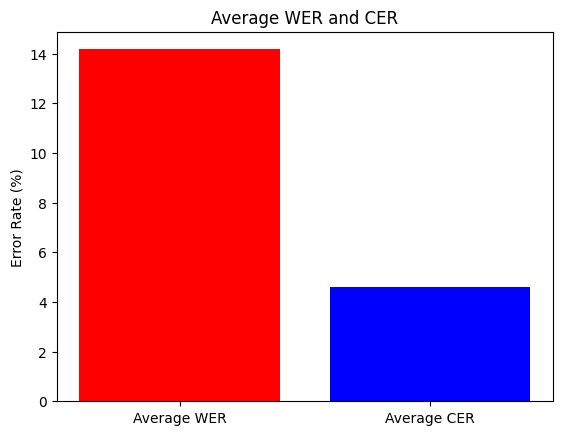

In [ ]:
import matplotlib.pyplot as plt
# Create a simple bar chart for average WER and CER
fig, ax = plt.subplots()
ax.bar(['Average WER', 'Average CER'], [average_wer, average_cer], color=['red', 'blue'])
ax.set_ylabel('Error Rate (%)')
ax.set_title('Average WER and CER')

# Show the plot
plt.show()

In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 44.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 88.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 76.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 30.6 MB/s eta 0:00:00


In [ ]:
!pip install sentencepiece

In [ ]:
!pip install rouge-Score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge-Score: filename=rouge_score-0.1.2-py3-none-any.whl size=24933 sha256=a659337ec0b6cf921d8842dcd9046cd23eac41858e259c8dce3be7819d1ecfa5
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge-Score


In [ ]:
from transformers import T5Tokenizer, T5ForConditionalGeneration
from rouge_score import rouge_scorer
df = data.iloc[:40,:]
# Load T5 model and tokenizer
my_model = T5ForConditionalGeneration.from_pretrained('t5-large')
tokenizer = T5Tokenizer.from_pretrained('t5-large')

# Function to generate summaries
def generate_summary(text):
    input_text = "summarize:" + text
    input_ids = tokenizer.encode(input_text, return_tensors='pt', max_length=512)
    summary_ids = my_model.generate(input_ids)
    t5_summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return t5_summary

# Apply the function to each row of the DataFrame
df['generated_summary'] = df['Text'].apply(generate_summary)

# Function to calculate ROUGE scores
def calculate_rouge(reference, hypothesis):
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    scores = scorer.score(reference, hypothesis)
    return scores

# Apply the functions to the DataFrame
df['rouge_scores'] = df.apply(lambda row: calculate_rouge(row['original_summary'], row['generated_summary']), axis=1)

# Extract individual ROUGE scores
df['rouge1_precision'] = df['rouge_scores'].apply(lambda x: x['rouge1'].precision)
df['rouge1_recall'] = df['rouge_scores'].apply(lambda x: x['rouge1'].recall)
df['rouge1_f1'] = df['rouge_scores'].apply(lambda x: x['rouge1'].fmeasure)

df['rouge2_precision'] = df['rouge_scores'].apply(lambda x: x['rouge2'].precision)
df['rouge2_recall'] = df['rouge_scores'].apply(lambda x: x['rouge2'].recall)
df['rouge2_f1'] = df['rouge_scores'].apply(lambda x: x['rouge2'].fmeasure)

df['rougeL_precision'] = df['rouge_scores'].apply(lambda x: x['rougeL'].precision)
df['rougeL_recall'] = df['rouge_scores'].apply(lambda x: x['rougeL'].recall)
df['rougeL_f1'] = df['rouge_scores'].apply(lambda x: x['rougeL'].fmeasure)

# Print or use the ROUGE scores as needed
print(df[['rouge1_precision', 'rouge1_recall', 'rouge1_f1', 'rouge2_precision', 'rouge2_recall', 'rouge2_f1', 'rougeL_precision', 'rougeL_recall', 'rougeL_f1']])


/usr/local/lib/python3.10/dist-packages/transformers/models/t5/tokenization_t5.py:238: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-large automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences 

In [ ]:
# Calculate average ROUGE scores
average_rouge1_precision = df['rouge1_precision'].mean()
average_rouge1_recall = df['rouge1_recall'].mean()
average_rouge1_f1 = df['rouge1_f1'].mean()

average_rouge2_precision = df['rouge2_precision'].mean()
average_rouge2_recall = df['rouge2_recall'].mean()
average_rouge2_f1 = df['rouge2_f1'].mean()

average_rougeL_precision = df['rougeL_precision'].mean()
average_rougeL_recall = df['rougeL_recall'].mean()
average_rougeL_f1 = df['rougeL_f1'].mean()

# Print or use the average ROUGE scores as needed
print("Average ROUGE-1 Precision:", average_rouge1_precision)
print("Average ROUGE-1 Recall:", average_rouge1_recall)
print("Average ROUGE-1 F1 Score:", average_rouge1_f1)

print("\nAverage ROUGE-2 Precision:", average_rouge2_precision)
print("Average ROUGE-2 Recall:", average_rouge2_recall)
print("Average ROUGE-2 F1 Score:", average_rouge2_f1)

print("\nAverage ROUGE-L Precision:", average_rougeL_precision)
print("Average ROUGE-L Recall:", average_rougeL_recall)
print("Average ROUGE-L F1 Score:", average_rougeL_f1)


Average ROUGE-1 Precision: 0.1973627414252414
Average ROUGE-1 Recall: 0.1255510913478492
Average ROUGE-1 F1 Score: 0.14160235693797418

Average ROUGE-2 Precision: 0.05638902763902763
Average ROUGE-2 Recall: 0.028560704810704808
Average ROUGE-2 F1 Score: 0.031103947561621093

Average ROUGE-L Precision: 0.1721075799200799
Average ROUGE-L Recall: 0.10891181498827676
Average ROUGE-L F1 Score: 0.1223744234814986


In [ ]:
from transformers import PegasusForConditionalGeneration, PegasusTokenizer, PegasusConfig
import torch

configuration = PegasusConfig(max_position_embeddings=2048)
model_name = "google/pegasus-xsum"
tokenizer = PegasusTokenizer.from_pretrained(model_name)
model = PegasusForConditionalGeneration.from_pretrained(model_name)


def abstractive_summarization(long_text, max_chunk_size=512, summary_length=200):
    chunks = [long_text[i:i+max_chunk_size] for i in range(0, len(long_text), max_chunk_size)]
    summaries = []

    for chunk in chunks:
        inputs = tokenizer.encode("summarize: " + chunk, return_tensors="pt", max_length=max_chunk_size, truncation=True)
        summary_ids = model.generate(inputs, max_length=summary_length, min_length=5, length_penalty=2.0, num_beams=4, early_stopping=True)
        summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
        summaries.append(summary)

    n = " ".join(summaries)
    input = tokenizer.encode("summarize: " + n, return_tensors="pt", max_length=1000, truncation=True)
    summary_ids_final = model.generate(input, max_length=50, min_length=5, length_penalty=2.0, num_beams=4, early_stopping=True)
    summary_final = tokenizer.decode(summary_ids_final[0], skip_special_tokens=True)
    return summary_final


# Example usage
long_text = data['Text'][0]
result = abstractive_summarization(long_text)
print("Generated Summary:", result)

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-xsum and are newly initialized: ['model.encoder.embed_positions.weight', 'model.decoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Generated Summary: A selection of short stories from the BBC's Children in Need appeal:


In [ ]:
!pip install rouge_score
from rouge_score import rouge_scorer

def calculate_rouge(reference, hypothesis):
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    scores = scorer.score(reference, hypothesis)
    return scores

# Example usage
reference_text = data['original_summary'][0]
hypothesis_text = result

scores = calculate_rouge(reference_text, hypothesis_text)

print("ROUGE-1 Precision:", scores['rouge1'].precision)
print("ROUGE-1 Recall:", scores['rouge1'].recall)
print("ROUGE-1 F1 Score:", scores['rouge1'].fmeasure)

print("\nROUGE-2 Precision:", scores['rouge2'].precision)
print("ROUGE-2 Recall:", scores['rouge2'].recall)
print("ROUGE-2 F1 Score:", scores['rouge2'].fmeasure)

print("\nROUGE-L Precision:", scores['rougeL'].precision)
print("ROUGE-L Recall:", scores['rougeL'].recall)
print("ROUGE-L F1 Score:", scores['rougeL'].fmeasure)

ROUGE-1 Precision: 0.15384615384615385
ROUGE-1 Recall: 0.25
ROUGE-1 F1 Score: 0.1904761904761905

ROUGE-2 Precision: 0.0
ROUGE-2 Recall: 0.0
ROUGE-2 F1 Score: 0.0

ROUGE-L Precision: 0.07692307692307693
ROUGE-L Recall: 0.125
ROUGE-L F1 Score: 0.09523809523809525


In [ ]:
'''model_name='google/flan-t5-large'

model = AutoModelForSeq2SeqLM.from_pretrained(model_name)'''

"model_name='google/flan-t5-large'\n\nmodel = AutoModelForSeq2SeqLM.from_pretrained(model_name)"

In [ ]:
#tokenizer = AutoTokenizer.from_pretrained(model_name)

In [ ]:
'''prompt = f"""
Summarize the following conversation.

{text1}

Summary:
    """
'''

'prompt = f"""\nSummarize the following conversation.\n\n{text1}\n\nSummary:\n    """\n'

In [ ]:
# Input constructed prompt instead of the dialogue.
'''inputs = tokenizer(prompt, return_tensors='pt')
output = tokenizer.decode(
        model.generate(
            inputs["input_ids"],
            max_new_tokens=50,
        )[0],
        skip_special_tokens=True
    )'''

'inputs = tokenizer(prompt, return_tensors=\'pt\')\noutput = tokenizer.decode(\n        model.generate(\n            inputs["input_ids"], \n            max_new_tokens=50,\n        )[0], \n        skip_special_tokens=True\n    )'

In [ ]:
#output

In [ ]:
'''def summarize_text(input_text, model_name=model_name):
    # Load summarization pipeline
    summarizer = pipeline('summarization', model=model_name, tokenizer=model_name)

    # Split the input text into chunks with a maximum length of 512 tokens
    max_length = 512
    chunks = [input_text[i:i + max_length] for i in range(0, len(input_text), max_length)]

    # Generate summaries for each chunk
    summaries = []
    for chunk in chunks:
        # Adjust max_length manually based on the length of the chunk
        max_length_chunk = min(len(chunk) + 20, 150)  # You can adjust the value 20 based on your preferences
        summary = summarizer(chunk, max_length=max_length_chunk, min_length=10, length_penalty=2.0, num_beams=4, early_stopping=True)[0]['summary_text']
        summaries.append(summary)

    # Combine the summaries from each chunk
    final_summary = " ".join(summaries)

    return final_summary'''

'def summarize_text(input_text, model_name=model_name):\n    # Load summarization pipeline\n    summarizer = pipeline(\'summarization\', model=model_name, tokenizer=model_name)\n\n    # Split the input text into chunks with a maximum length of 512 tokens\n    max_length = 512\n    chunks = [input_text[i:i + max_length] for i in range(0, len(input_text), max_length)]\n\n    # Generate summaries for each chunk\n    summaries = []\n    for chunk in chunks:\n        # Adjust max_length manually based on the length of the chunk\n        max_length_chunk = min(len(chunk) + 20, 150)  # You can adjust the value 20 based on your preferences\n        summary = summarizer(chunk, max_length=max_length_chunk, min_length=10, length_penalty=2.0, num_beams=4, early_stopping=True)[0][\'summary_text\']\n        summaries.append(summary)\n\n    # Combine the summaries from each chunk\n    final_summary = " ".join(summaries)\n\n    return final_summary'

In [ ]:
'''input_text = text1
summary = summarize_text(input_text)
print("Original text:\n", input_text)
print("\nSummarized text:\n", summary)'''

'input_text = text1\nsummary = summarize_text(input_text)\nprint("Original text:\n", input_text)\nprint("\nSummarized text:\n", summary)'

In [ ]:
from transformers import pipeline

def summarize_text(input_text, model_name="google/pegasus-large"):
    summarizer = pipeline('summarization', model=model_name, tokenizer=model_name)
    summary = summarizer(input_text, max_length=80, min_length=20, length_penalty=2.0, num_beams=4, early_stopping=True)[0]['summary_text']
    return summary

# Example usage
input_text = """
Black Beauty by Anna Sewell Part 2 Chapter 23 A Strike for Liberty One day my lady came down later than usual, and the silk rustled more than ever. Drive to the duchesses, she said, and then after a pause, are you never going to get those horses heads up, York? Raise them at once, and let us have no more of this humoring and nonsense. York came to me first, while the groom stood at Ginger's head...
"""
summary = summarize_text(input_text)
print("Original text:\n", input_text)
print("\nSummarized text:\n", summary)


Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-large and are newly initialized: ['model.encoder.embed_positions.weight', 'model.decoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Original text:
 
Black Beauty by Anna Sewell Part 2 Chapter 23 A Strike for Liberty One day my lady came down later than usual, and the silk rustled more than ever. Drive to the duchesses, she said, and then after a pause, are you never going to get those horses heads up, York? Raise them at once, and let us have no more of this humoring and nonsense. York came to me first, while the groom stood at Ginger's head...


Summarized text:
 Black Beauty by Anna Sewell Part 2 Chapter 23 A Strike for Liberty One day my lady came down later than usual, and the silk rustled more than ever. York came to me first, while the groom stood at Ginger's head...


In [ ]:
# Example usage
reference_text = 'The use of the check rein has unintended consequences for Ginger and Black Beauty.'
hypothesis_text = summary

scores = calculate_rouge(reference_text, hypothesis_text)

print("ROUGE-1 Precision:", scores['rouge1'].precision)
print("ROUGE-1 Recall:", scores['rouge1'].recall)
print("ROUGE-1 F1 Score:", scores['rouge1'].fmeasure)

print("\nROUGE-2 Precision:", scores['rouge2'].precision)
print("ROUGE-2 Recall:", scores['rouge2'].recall)
print("ROUGE-2 F1 Score:", scores['rouge2'].fmeasure)

print("\nROUGE-L Precision:", scores['rougeL'].precision)
print("ROUGE-L Recall:", scores['rougeL'].recall)
print("ROUGE-L F1 Score:", scores['rougeL'].fmeasure)

ROUGE-1 Precision: 0.16666666666666666
ROUGE-1 Recall: 0.5
ROUGE-1 F1 Score: 0.25

ROUGE-2 Precision: 0.024390243902439025
ROUGE-2 Recall: 0.07692307692307693
ROUGE-2 F1 Score: 0.03703703703703704

ROUGE-L Precision: 0.07142857142857142
ROUGE-L Recall: 0.21428571428571427
ROUGE-L F1 Score: 0.10714285714285714


In [ ]:
from transformers import T5ForConditionalGeneration, T5Tokenizer

def abstractive_summarize(input_text, model_name="t5-small"):
    # Load pre-trained T5 model and tokenizer
    model = T5ForConditionalGeneration.from_pretrained(model_name)
    tokenizer = T5Tokenizer.from_pretrained(model_name)

    # Tokenize and generate summary
    input_ids = tokenizer(input_text, return_tensors="pt", max_length=1024, truncation=True).input_ids
    summary_ids = model.generate(input_ids, max_length=100, length_penalty=2.0, num_beams=4, early_stopping=True)

    # Decode and return the summary
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary

# Example usage
input_text = """
Black Beauty by Anna Sewell Part 2 Chapter 23 A Strike for Liberty One day my lady came down later than usual, and the silk rustled more than ever. Drive to the duchesses, she said, and then after a pause, are you never going to get those horses heads up, York? Raise them at once, and let us have no more of this humoring and nonsense. York came to me first, while the groom stood at Ginger's head. He drew my head back and fixed the reins so tight that it was almost intolerable...
"""
summary = abstractive_summarize(input_text)
print("Original text:\n", input_text)
print("\nAbstractive summary:\n", summary)


Original text:
 
Black Beauty by Anna Sewell Part 2 Chapter 23 A Strike for Liberty One day my lady came down later than usual, and the silk rustled more than ever. Drive to the duchesses, she said, and then after a pause, are you never going to get those horses heads up, York? Raise them at once, and let us have no more of this humoring and nonsense. York came to me first, while the groom stood at Ginger's head. He drew my head back and fixed the reins so tight that it was almost intolerable...


Abstractive summary:
 Black Beauty by Anna Sewell Part 2 Chapter 23 A Strike for Liberty One day my lady came down later than usual, and the silk rustled more than ever. York came down later than usual, and the silk rustled more than ever, and the silk rustled more.


In [ ]:
# Example usage
reference_text = 'The use of the check rein has unintended consequences for Ginger and Black Beauty.'
hypothesis_text = summary

scores = calculate_rouge(reference_text, hypothesis_text)

print("ROUGE-1 Precision:", scores['rouge1'].precision)
print("ROUGE-1 Recall:", scores['rouge1'].recall)
print("ROUGE-1 F1 Score:", scores['rouge1'].fmeasure)

print("\nROUGE-2 Precision:", scores['rouge2'].precision)
print("ROUGE-2 Recall:", scores['rouge2'].recall)
print("ROUGE-2 F1 Score:", scores['rouge2'].fmeasure)

print("\nROUGE-L Precision:", scores['rougeL'].precision)
print("ROUGE-L Recall:", scores['rougeL'].recall)
print("ROUGE-L F1 Score:", scores['rougeL'].fmeasure)

ROUGE-1 Precision: 0.1276595744680851
ROUGE-1 Recall: 0.42857142857142855
ROUGE-1 F1 Score: 0.1967213114754098

ROUGE-2 Precision: 0.021739130434782608
ROUGE-2 Recall: 0.07692307692307693
ROUGE-2 F1 Score: 0.03389830508474576

ROUGE-L Precision: 0.06382978723404255
ROUGE-L Recall: 0.21428571428571427
ROUGE-L F1 Score: 0.0983606557377049


In [ ]:
!pip install datasets

In [ ]:
from datasets import DatasetDict, Dataset
from sklearn.model_selection import train_test_split
import pandas as pd
# Assuming your pandas DataFrame is named df
df = pd.read_csv('/content/data_train.csv')

test_df = pd.read_csv('/content/final_data.csv')
# Create custom datasets for train, validation, and test using the 'original_text' and 'original_summary' columns
train_dataset = Dataset.from_pandas(df[['original_text', 'original_summary']])
test_dataset = Dataset.from_pandas(test_df[['original_text', 'original_summary']])

# Create a DatasetDict with 'train', 'val', and 'test' keys
dataset = DatasetDict({'train': train_dataset, 'test': test_dataset})


In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['original_text', 'original_summary'],
        num_rows: 415
    })
    test: Dataset({
        features: ['original_text', 'original_summary'],
        num_rows: 85
    })
})

In [ ]:
!pip install transformers

In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, DataCollatorForSeq2Seq, Seq2SeqTrainingArguments, Seq2SeqTrainer
model = AutoModelForSeq2SeqLM.from_pretrained("t5-base")
tokenizer = AutoTokenizer.from_pretrained('t5-base')

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/t5/tokenization_t5_fast.py:160: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


In [ ]:
def tokenize_function(example):
    start_prompt = 'Summarize the following conversation.\n\n'
    end_prompt = '\n\nSummary: '
    prompt = [start_prompt + dialogue + end_prompt for dialogue in example["original_text"]]
    example['input_ids'] = tokenizer(prompt, padding="max_length", truncation=True, return_tensors="pt").input_ids
    example['labels'] = tokenizer(example["original_summary"], padding="max_length", truncation=True, return_tensors="pt").input_ids

    return example

In [ ]:
tokenized_data = dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/415 [00:00<?, ? examples/s]

Map:   0%|          | 0/85 [00:00<?, ? examples/s]

In [ ]:
tokenized_data

DatasetDict({
    train: Dataset({
        features: ['original_text', 'original_summary', 'input_ids', 'labels'],
        num_rows: 415
    })
    test: Dataset({
        features: ['original_text', 'original_summary', 'input_ids', 'labels'],
        num_rows: 85
    })
})

In [ ]:
tokenized_data = tokenized_data.remove_columns(['original_text', 'original_summary'])

In [ ]:
tokenized_data

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'labels'],
        num_rows: 415
    })
    test: Dataset({
        features: ['input_ids', 'labels'],
        num_rows: 85
    })
})

In [ ]:
!pip install accelerate

In [ ]:
import accelerate

accelerate.__version__

'0.24.1'

In [ ]:
!pip install rouge-score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24933 sha256=a43d857b230aee1e7d3c11c40df9b1245bb672e0f1214e62fa74151f44a08200
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge-score


In [ ]:
import accelerate
import transformers
training_args = Seq2SeqTrainingArguments(
    output_dir="./outputs",
    overwrite_output_dir=True,
    num_train_epochs=20,
    auto_find_batch_size=True,
    save_steps=10_000,
    save_total_limit=2,
)

trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_data["train"],
)


In [ ]:
trainer.train()

Step,Training Loss
500,0.162200
1000,0.120500
1500,0.097300
2000,0.084700


TrainOutput(global_step=2080, training_loss=0.11489435617740337, metrics={'train_runtime': 2432.4349, 'train_samples_per_second': 3.412, 'train_steps_per_second': 0.855, 'total_flos': 5054350491648000.0, 'train_loss': 0.11489435617740337, 'epoch': 20.0})

In [ ]:
model.save_pretrained("./model")
tokenizer.save_pretrained("./tokenizer")

('./tokenizer/tokenizer_config.json',
 './tokenizer/special_tokens_map.json',
 './tokenizer/tokenizer.json')

In [ ]:
data1=pd.read_csv('final_data.csv')
data1

,Filename,Text,original_text,original_summary
0,30,My Breaking In I was now beginning to grow ha...,I was now beginning to grow handsome; my coat ...,The narrator is taught to wear a saddl...
1,200,ley Chapter 11 Bad News Have you heard the new...,“Have you heard the news?” Tired Tim asked Bro...,Tired Tim and Grandaddy Beaver warn Br...
2,60,Ruined and Going Downhill As soon as my knees ...,As soon as my knees were sufficiently healed I...,Having sufficiently healed from his in...
3,56,Fair Start The name of the coachman was John ...,The name of the coachman was John Manly; he ha...,"Still in pleasant surroundings, Black ..."
4,36,A Talk in the Orchard Ginger and I were not of...,Ginger and I were not of the regular tall carr...,"Merrylegs, Ginger, and Black Beauty di..."
...,...,...,...,...
80,17,"Liberty I was quite happy in my new place, an...","I was quite happy in my new place, and if ther...",Black Beauty finds that his new duties...
81,44,The Lady Anne or a Runaway Horse Early in the ...,"Early in the spring, Lord W—— and part of his ...","With the Earl and Mr. York away, Lady ..."
82,164,"These things happened last winter, sir, said ...","“THESE THINGS happened last winter, sir,” said...","As Linton becomes more ill, Edgar admi..."
83,54,"Reuben Smith, who was left in charge of the s...","Now I must say a little about Reuben Smith, wh...",Black Beauty describes his experiences...


In [ ]:
from rouge_score import rouge_scorer
df = data1.iloc[:40,:]
# Load T5 model and tokenizer
my_model = AutoModelForSeq2SeqLM.from_pretrained("./model")
tokenizer = AutoTokenizer.from_pretrained("./tokenizer")

# Function to generate summaries
def generate_summary(text):
    input_text = "summarize:" + text
    input_ids = tokenizer.encode(input_text, return_tensors='pt', max_length=1024)
    summary_ids = my_model.generate(input_ids)
    t5_summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return t5_summary

# Apply the function to each row of the DataFrame
df['generated_summary'] = df['Text'].apply(generate_summary)

# Function to calculate ROUGE scores
def calculate_rouge(reference, hypothesis):
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    scores = scorer.score(reference, hypothesis)
    return scores
import bert_score

# Function to calculate BERTScore
def calculate_bertscore(reference, hypothesis):
    scorer = bert_score.BERTScorer(lang='en')
    _, _, f1 = scorer.score([reference], [hypothesis])
    return f1.item()  # Extracting the scalar value from the tensor

# Calculate BERTScore for each row of the DataFrame
df['bertscore'] = df.apply(lambda row: calculate_bertscore(row['original_summary'], row['generated_summary']), axis=1)

# Apply the functions to the DataFrame
df['rouge_scores'] = df.apply(lambda row: calculate_rouge(row['original_summary'], row['generated_summary']), axis=1)

# Extract individual ROUGE scores
df['rouge1_precision'] = df['rouge_scores'].apply(lambda x: x['rouge1'].precision)
df['rouge1_recall'] = df['rouge_scores'].apply(lambda x: x['rouge1'].recall)
df['rouge1_f1'] = df['rouge_scores'].apply(lambda x: x['rouge1'].fmeasure)

df['rouge2_precision'] = df['rouge_scores'].apply(lambda x: x['rouge2'].precision)
df['rouge2_recall'] = df['rouge_scores'].apply(lambda x: x['rouge2'].recall)
df['rouge2_f1'] = df['rouge_scores'].apply(lambda x: x['rouge2'].fmeasure)

df['rougeL_precision'] = df['rouge_scores'].apply(lambda x: x['rougeL'].precision)
df['rougeL_recall'] = df['rouge_scores'].apply(lambda x: x['rougeL'].recall)
df['rougeL_f1'] = df['rouge_scores'].apply(lambda x: x['rougeL'].fmeasure)


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
<ipython-input-50-a429db82f99b>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['generated_summa

In [ ]:
average_rouge1_precision = df['rouge1_precision'].mean()
average_rouge1_recall = df['rouge1_recall'].mean()
average_rouge1_f1 = df['rouge1_f1'].mean()

average_rouge2_precision = df['rouge2_precision'].mean()
average_rouge2_recall = df['rouge2_recall'].mean()
average_rouge2_f1 = df['rouge2_f1'].mean()

average_rougeL_precision = df['rougeL_precision'].mean()
average_rougeL_recall = df['rougeL_recall'].mean()
average_rougeL_f1 = df['rougeL_f1'].mean()

# Print or use the average ROUGE scores as needed
print("Average ROUGE-1 Precision:", average_rouge1_precision)
print("Average ROUGE-1 Recall:", average_rouge1_recall)
print("Average ROUGE-1 F1 Score:", average_rouge1_f1)

print("\nAverage ROUGE-2 Precision:", average_rouge2_precision)
print("Average ROUGE-2 Recall:", average_rouge2_recall)
print("Average ROUGE-2 F1 Score:", average_rouge2_f1)

print("\nAverage ROUGE-L Precision:", average_rougeL_precision)
print("Average ROUGE-L Recall:", average_rougeL_recall)
print("Average ROUGE-L F1 Score:", average_rougeL_f1)

Average ROUGE-1 Precision: 0.23914546517294197
Average ROUGE-1 Recall: 0.17032513021502899
Average ROUGE-1 F1 Score: 0.18135552053086534

Average ROUGE-2 Precision: 0.034115814740814744
Average ROUGE-2 Recall: 0.012982704701454701
Average ROUGE-2 F1 Score: 0.01761241805282285

Average ROUGE-L Precision: 0.18925212934210614
Average ROUGE-L Recall: 0.13438867380537173
Average ROUGE-L F1 Score: 0.14191325683246223


In [ ]:
!pip install bert_score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 1.2 MB/s eta 0:00:00


In [ ]:
# Print the average BERTScore
average_bertscore = df['bertscore'].mean()
print(f"Average BERTScore: {average_bertscore:.4f}")

Average BERTScore: 0.8642


In [ ]:
# Calculate average ROUGE scores
average_rouge1_precision = df['rouge1_precision'].mean()
average_rouge1_recall = df['rouge1_recall'].mean()
average_rouge1_f1 = df['rouge1_f1'].mean()

average_rouge2_precision = df['rouge2_precision'].mean()
average_rouge2_recall = df['rouge2_recall'].mean()
average_rouge2_f1 = df['rouge2_f1'].mean()

average_rougeL_precision = df['rougeL_precision'].mean()
average_rougeL_recall = df['rougeL_recall'].mean()
average_rougeL_f1 = df['rougeL_f1'].mean()

# Print or use the average ROUGE scores as needed
print("Average ROUGE-1 Precision:", average_rouge1_precision)
print("Average ROUGE-1 Recall:", average_rouge1_recall)
print("Average ROUGE-1 F1 Score:", average_rouge1_f1)

print("\nAverage ROUGE-2 Precision:", average_rouge2_precision)
print("Average ROUGE-2 Recall:", average_rouge2_recall)
print("Average ROUGE-2 F1 Score:", average_rouge2_f1)

print("\nAverage ROUGE-L Precision:", average_rougeL_precision)
print("Average ROUGE-L Recall:", average_rougeL_recall)
print("Average ROUGE-L F1 Score:", average_rougeL_f1)


Average ROUGE-1 Precision: 0.24153969600660777
Average ROUGE-1 Recall: 0.17811731671626724
Average ROUGE-1 F1 Score: 0.19137711049354464

Average ROUGE-2 Precision: 0.0354697385947386
Average ROUGE-2 Recall: 0.02391968191968192
Average ROUGE-2 F1 Score: 0.026249112956009506

Average ROUGE-L Precision: 0.19049331183522358
Average ROUGE-L Recall: 0.14118989475042698
Average ROUGE-L F1 Score: 0.1502694436773711


In [ ]:
!pip install peft

In [ ]:
original_model = AutoModelForSeq2SeqLM.from_pretrained("t5-large")

In [ ]:
from peft import LoraConfig, get_peft_model, TaskType

lora_config = LoraConfig(
    r=32, # Rank
    lora_alpha=32,
    target_modules=["q", "v"],
    lora_dropout=0.05,
    bias="none",
    task_type=TaskType.SEQ_2_SEQ_LM
)

In [ ]:
peft_model = get_peft_model(original_model,
                            lora_config)

In [ ]:
output_dir = f'./peft_ft'

peft_training_args = Seq2SeqTrainingArguments(
    output_dir=output_dir,
    auto_find_batch_size=True,
    learning_rate=1e-3, # Higher learning rate than full fine-tuning.
    num_train_epochs=20,
    logging_steps=1,
    max_steps=1
)

peft_trainer = Seq2SeqTrainer(
    model=peft_model,
    args=peft_training_args,
    train_dataset=tokenized_data["train"],
)

In [ ]:
peft_trainer.train()

#peft_model_path="./peft-dialogue-summary-checkpoint-local"

#peft_trainer.model.save_pretrained(peft_model_path)
#tokenizer.save_pretrained(peft_model_path)

Step,Training Loss
1,29.701300


TrainOutput(global_step=1, training_loss=29.701251983642578, metrics={'train_runtime': 1.2864, 'train_samples_per_second': 1.555, 'train_steps_per_second': 0.777, 'total_flos': 4388076650496.0, 'train_loss': 29.701251983642578, 'epoch': 0.01})

In [ ]:
from peft import PeftModel, PeftConfig

peft_model_base = AutoModelForSeq2SeqLM.from_pretrained("google/flan-t5-base", torch_dtype=torch.bfloat16)
tokenizer = AutoTokenizer.from_pretrained("google/flan-t5-base")

peft_model = PeftModel.from_pretrained(peft_model_base,
                                       './peft-dialogue-summary-checkpoint-from-s3/',
                                       torch_dtype=torch.bfloat16,
                                       is_trainable=False)